# Importações

In [294]:
import pandas as pd
from math import floor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import mstats
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pandas as pd
from math import floor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.metrics import accuracy_score,classification_report, f1_score, confusion_matrix,recall_score,precision_score

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import f_classif, f_oneway, chi2,mutual_info_classif 
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


*EUEXFREQ*: Frequência (vezes) de atividades físicas nos últimos 7 dias (1 a 97).

*EUGENHTH*: Autoavaliação da saúde física:
    - 1: Excelente até 5: Ruim.

*EUFASTFDFRQ*: Frequência de compras de fast food ou alimentos prontos nos últimos 7 dias (1 a 95).

*EUDIETSODA*: Tipo de refrigerante consumido:
    - 0: Não toma refri.
    - 1: Diet.
    - 2: Normal.
    - 3: Ambos.

*EUWGT*: Peso em KG.

*EUHGT*: Altura sem sapatos, em metros.

# DataFrames

In [295]:
df_kmeans = pd.read_excel("..\dados\df_kmeans.xlsx")

display(df_kmeans.head(2))

df_dbscan = pd.read_excel("..\dados\df_dbscan.xlsx")

display(df_dbscan.head(2))

df_agglomerative = pd.read_excel("..\dados\df_agglomerative.xlsx")

display(df_agglomerative.head(2))

df_meanshift = pd.read_excel("..\dados\df_meanshift.xlsx")

display(df_meanshift.head(2))



,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,0,1,0,0,77.11,1.52,1
1,0,2,1,0,58.06,1.60,1


,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,0,1,0,0,77.11,1.52,0
1,0,2,1,0,58.06,1.60,0


,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,0,1,0,0,77.11,1.52,0
1,0,2,1,0,58.06,1.60,0


,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,0,1,0,0,77.11,1.52,0
1,0,2,1,0,58.06,1.60,0


*EUEXFREQ*: Frequência (vezes) de atividades físicas nos últimos 7 dias (1 a 97).

*EUGENHTH*: Autoavaliação da saúde física:
    - 1: Excelente até 5: Ruim.

*EUFASTFDFRQ*: Frequência de compras de fast food ou alimentos prontos nos últimos 7 dias (1 a 95).

*EUDIETSODA*: Tipo de refrigerante consumido:
    - 0: Não toma refri.
    - 1: Diet.
    - 2: Normal.
    - 3: Ambos.

*EUWGT*: Peso em KG.

*EUHGT*: Altura sem sapatos, em metros.

In [296]:
pd.set_option('display.max_columns', None)


In [297]:
df_normalizado_kmeans = pd.read_excel("..\dados\df_normalizado_kmeans.xlsx")

display(df_normalizado_kmeans.head(2))

df_normalizado_dbscan = pd.read_excel("..\dados\df_normalizado_dbscan.xlsx")

display(df_normalizado_dbscan.head(2))

df_normalizado_agglomerative = pd.read_excel("..\dados\df_normalizado_agglomerative.xlsx")

display(df_normalizado_agglomerative.head(2))

df_normalizado_meanshift = pd.read_excel("..\dados\df_normalizado_meanshift.xlsx")

display(df_normalizado_meanshift.head(2))

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,1
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,4


,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,0
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,0


,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,0
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,0


,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,-0.902436,-1.415701,-0.735128,-0.567962,-0.141686,-1.654752,0
1,-0.902436,-0.475433,-0.272297,-0.567962,-1.091890,-0.893748,0


In [298]:
display(df_kmeans['Clusters'].value_counts())
display(df_dbscan['Clusters'].value_counts())
display(df_agglomerative['Clusters'].value_counts())
display(df_meanshift['Clusters'].value_counts())

1    6992
0    3565
Name: Clusters, dtype: int64

 0    7447
-1    3110
Name: Clusters, dtype: int64

0    9510
2    1046
1       1
Name: Clusters, dtype: int64

0    9947
1     610
Name: Clusters, dtype: int64

# Plotagens

*EUEXFREQ*: Frequência (vezes) de atividades físicas nos últimos 7 dias (1 a 97).

*EUGENHTH*: Autoavaliação da saúde física:
    - 1: Excelente até 5: Ruim.

*EUFASTFDFRQ*: Frequência de compras de fast food ou alimentos prontos nos últimos 7 dias (1 a 95).

*EUDIETSODA*: Tipo de refrigerante consumido:
    - 0: Não toma refri.
    - 1: Diet.
    - 2: Normal.
    - 3: Ambos.

*EUWGT*: Peso em KG.

*EUHGT*: Altura sem sapatos, em metros.

In [299]:
lista_dfs = [df_kmeans,df_dbscan,df_agglomerative,df_meanshift]

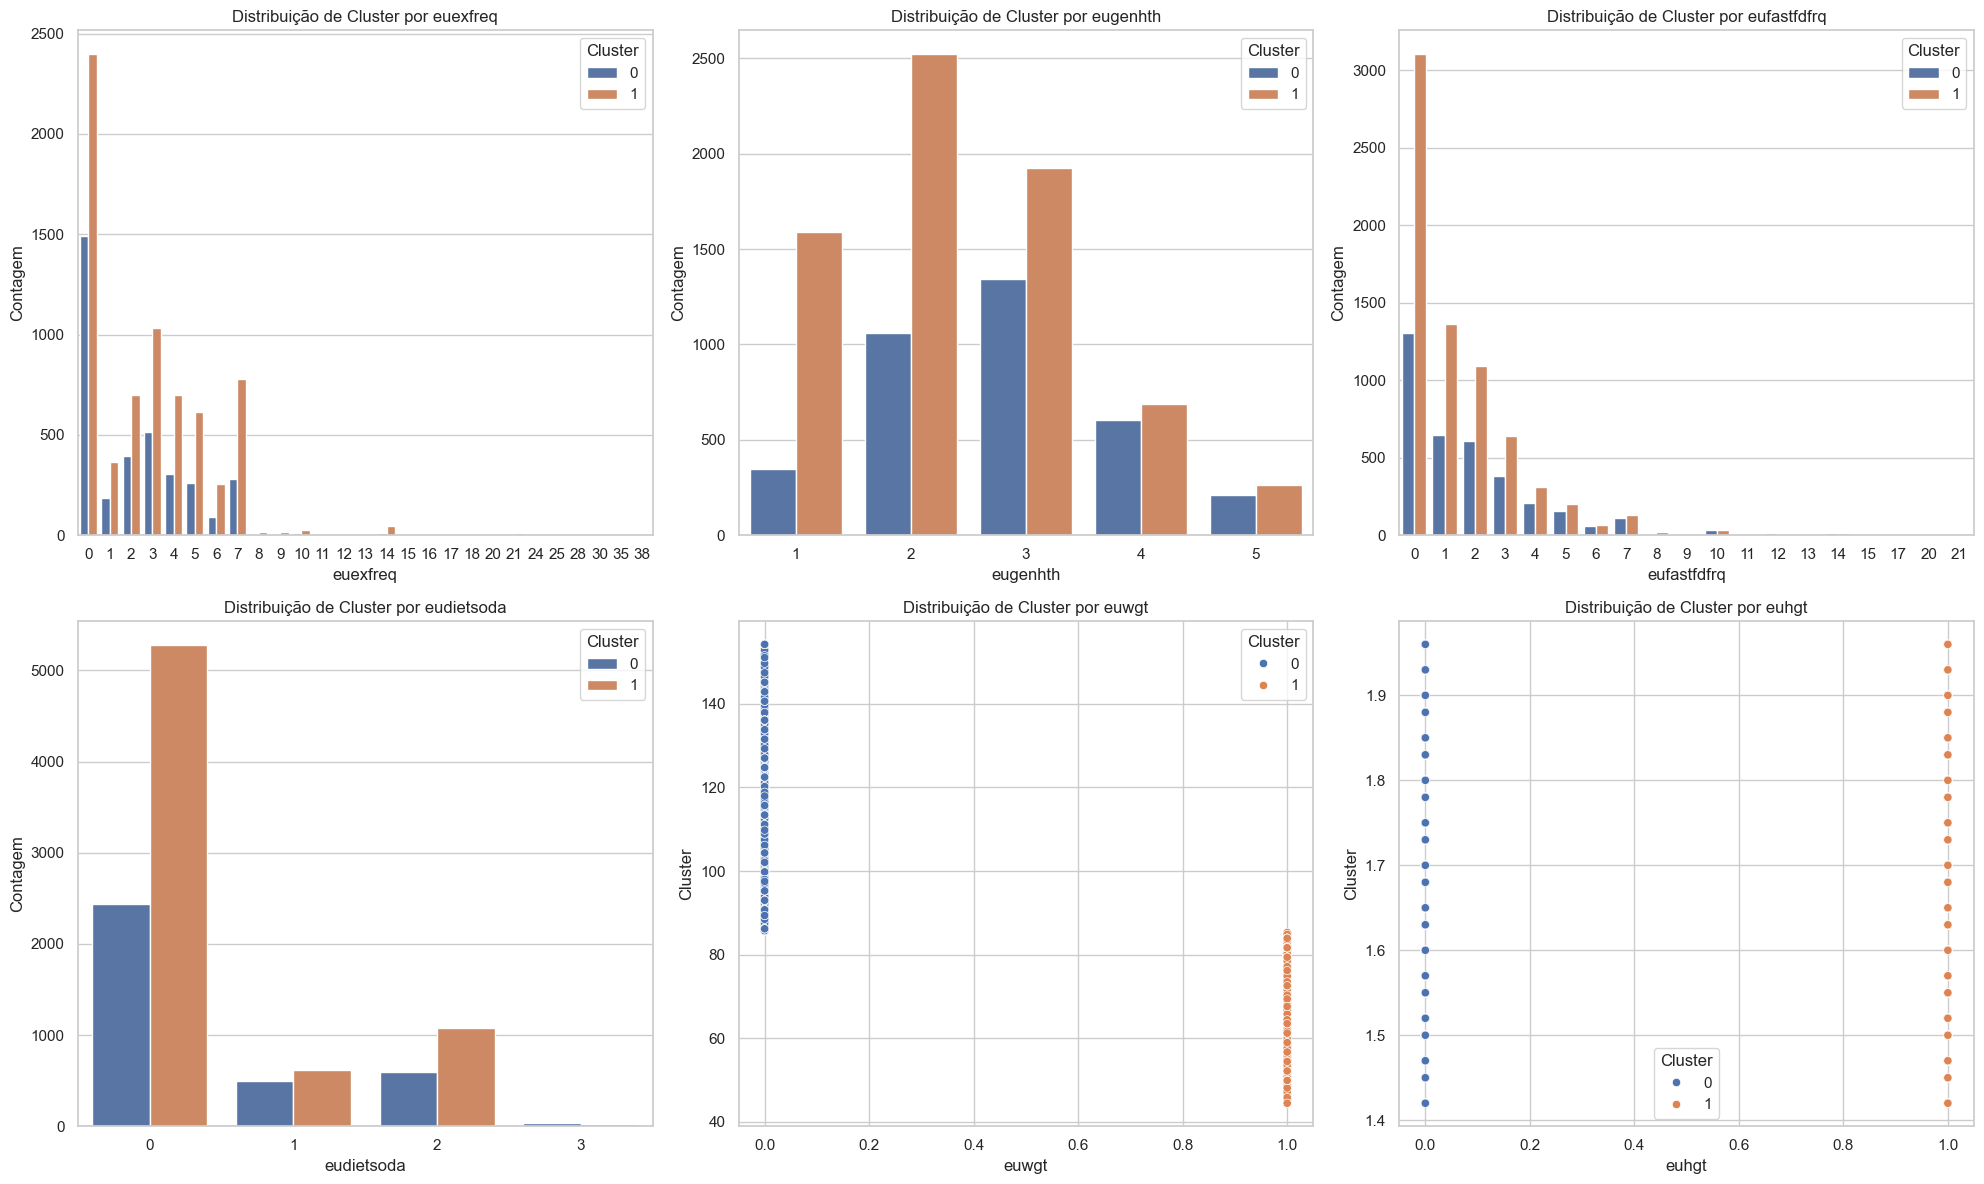

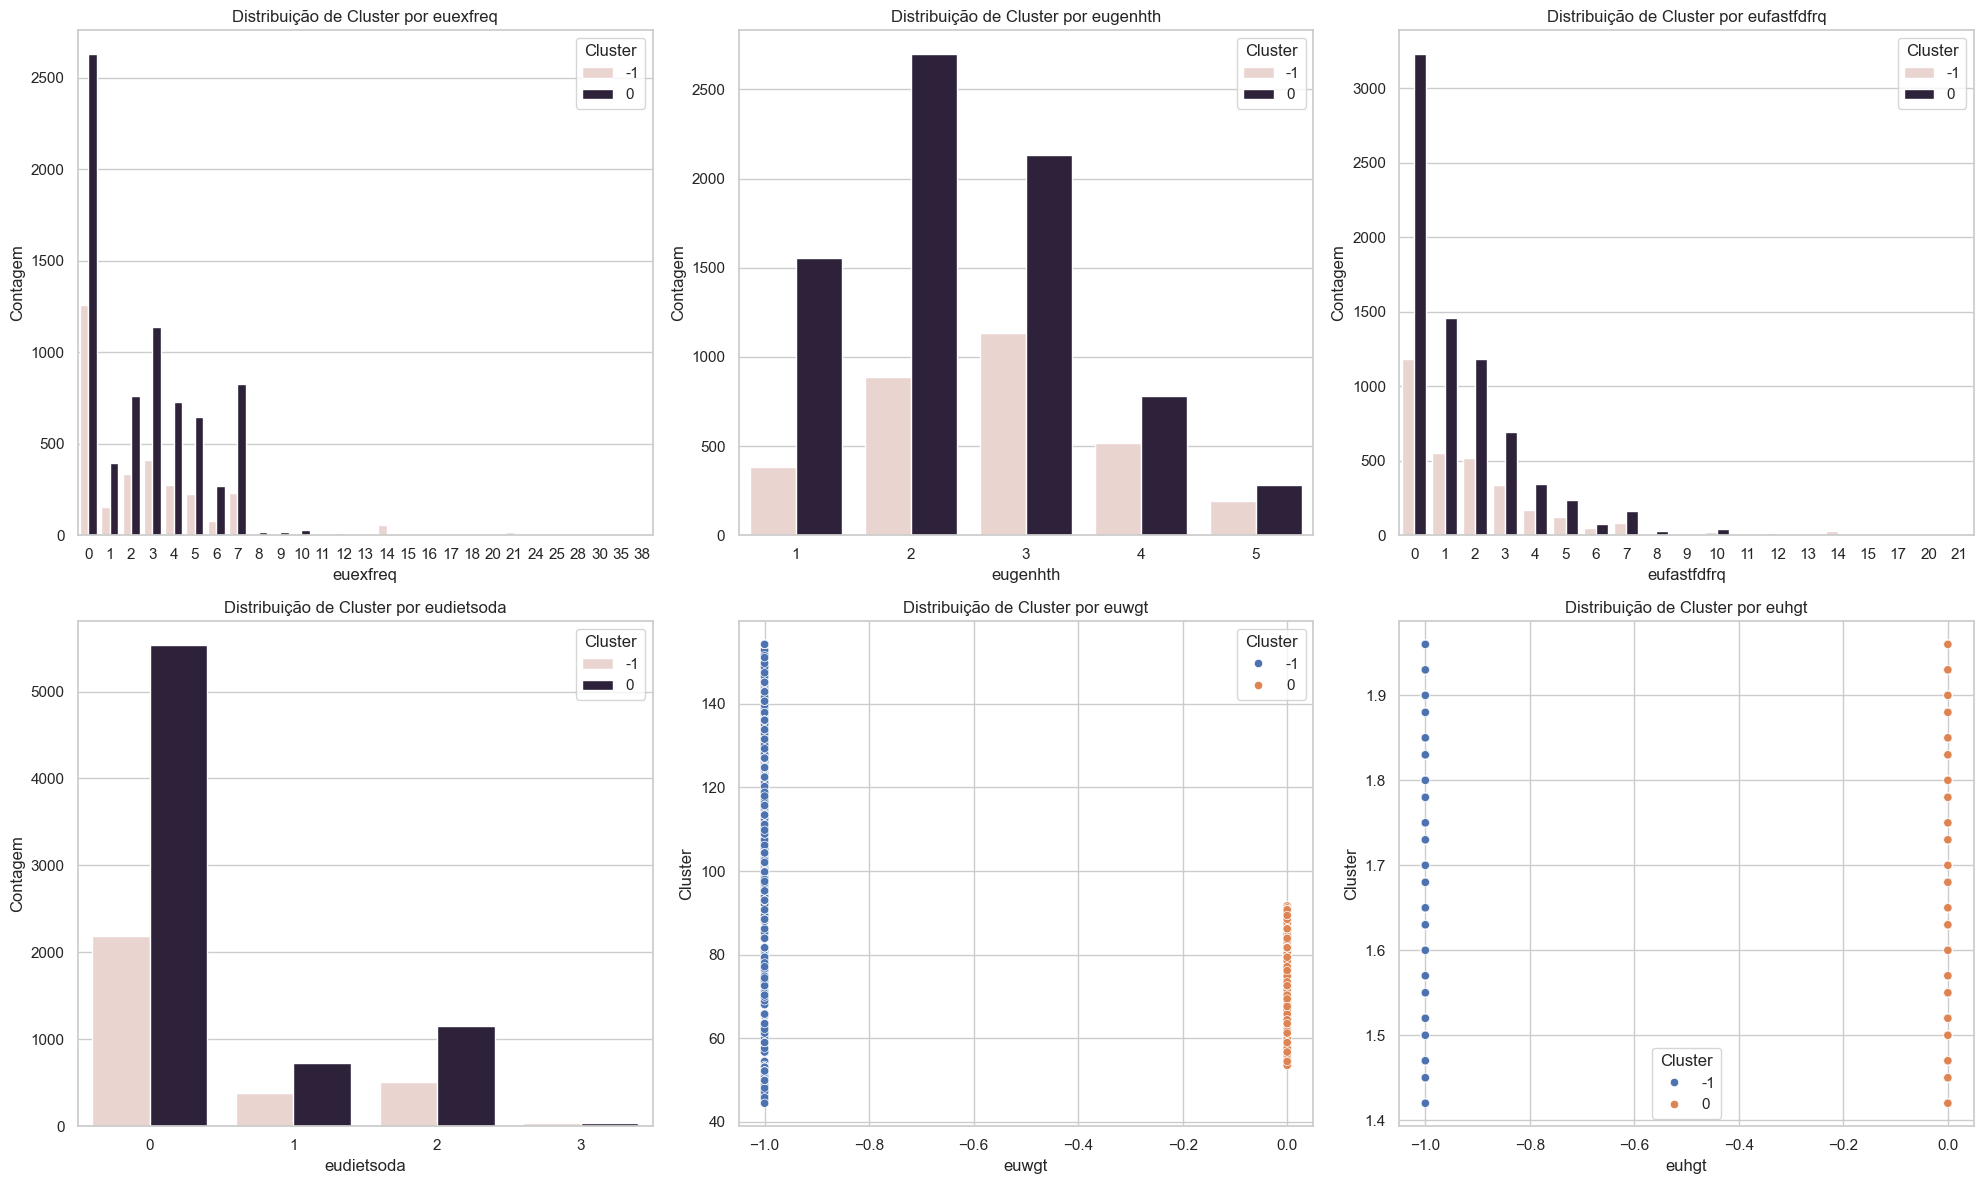

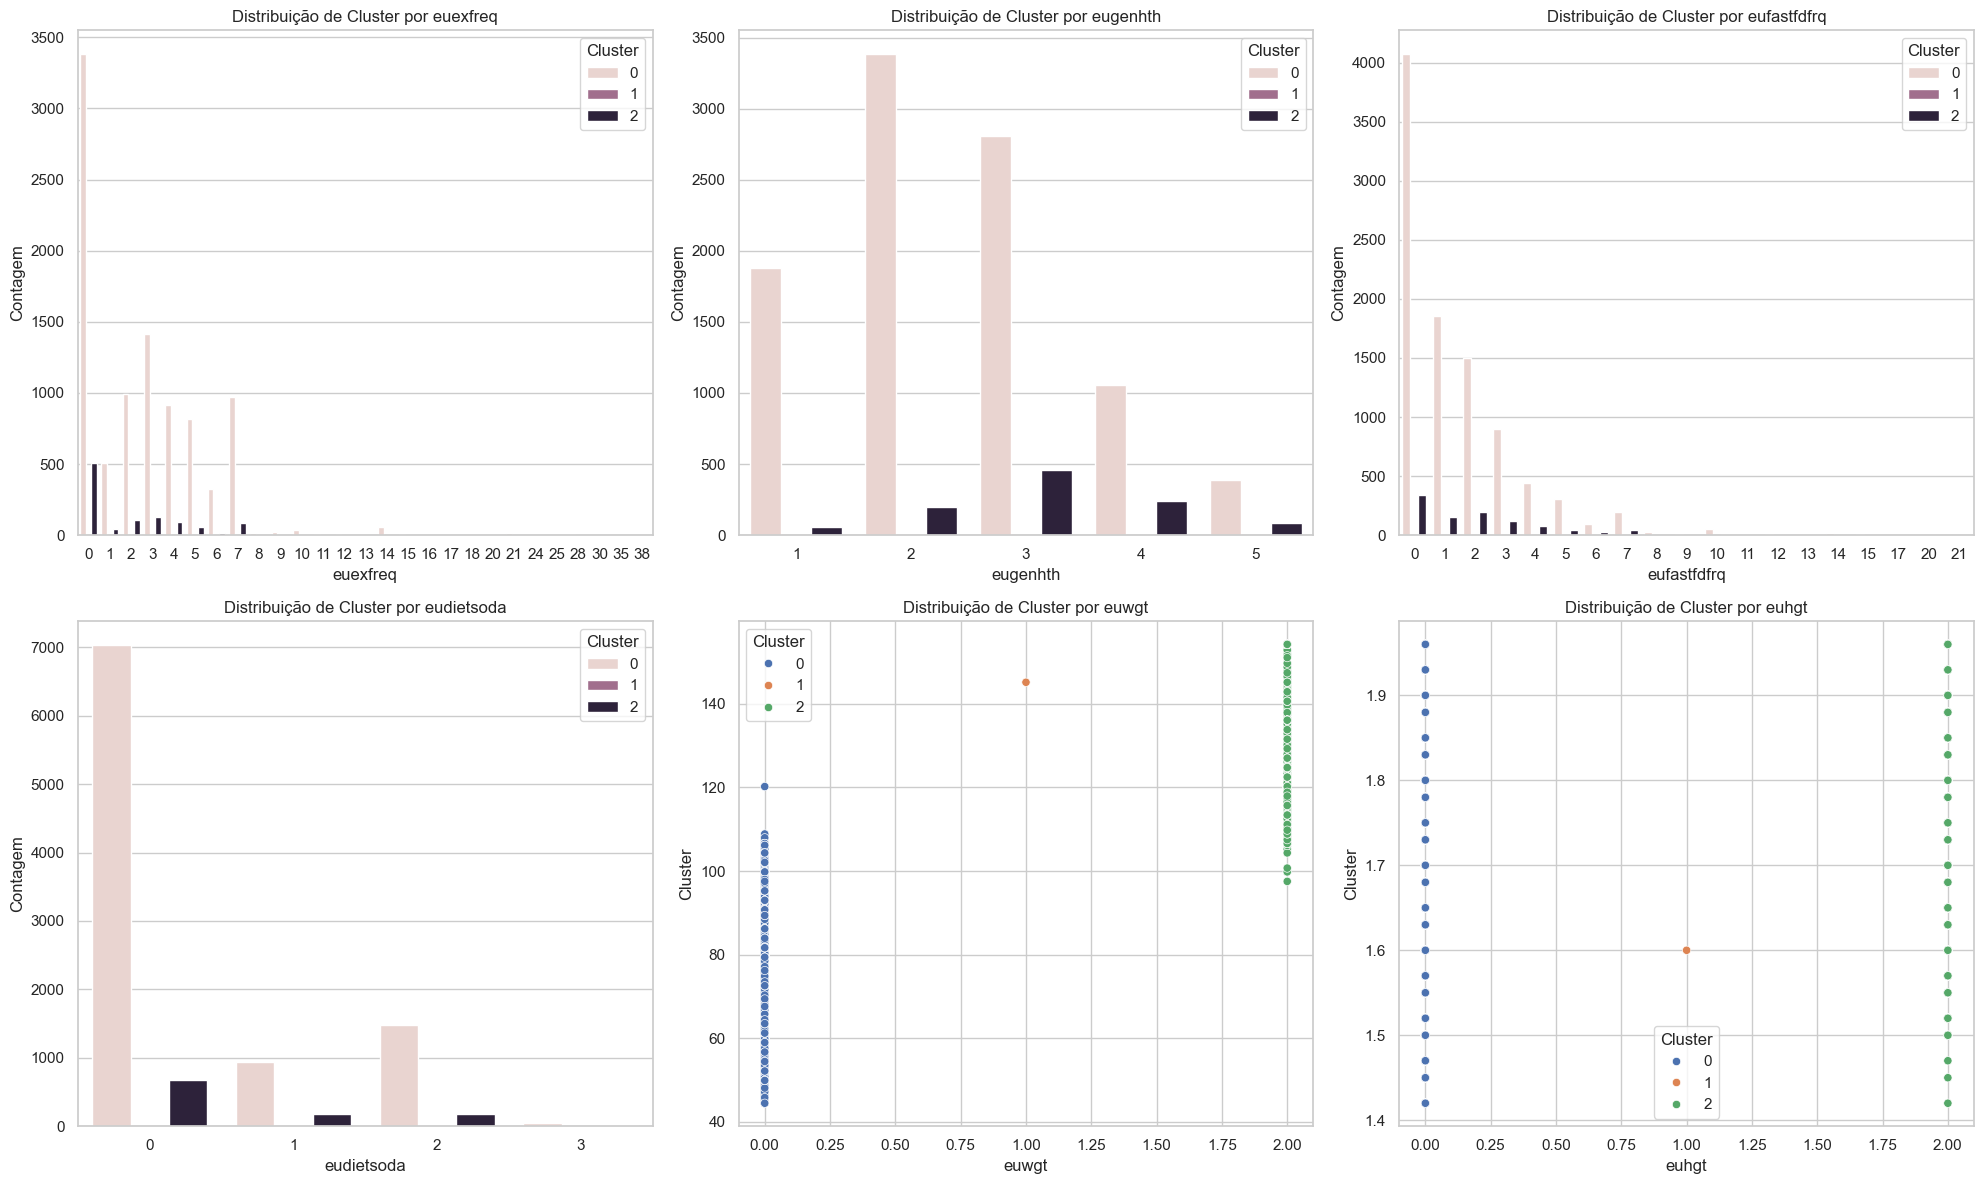

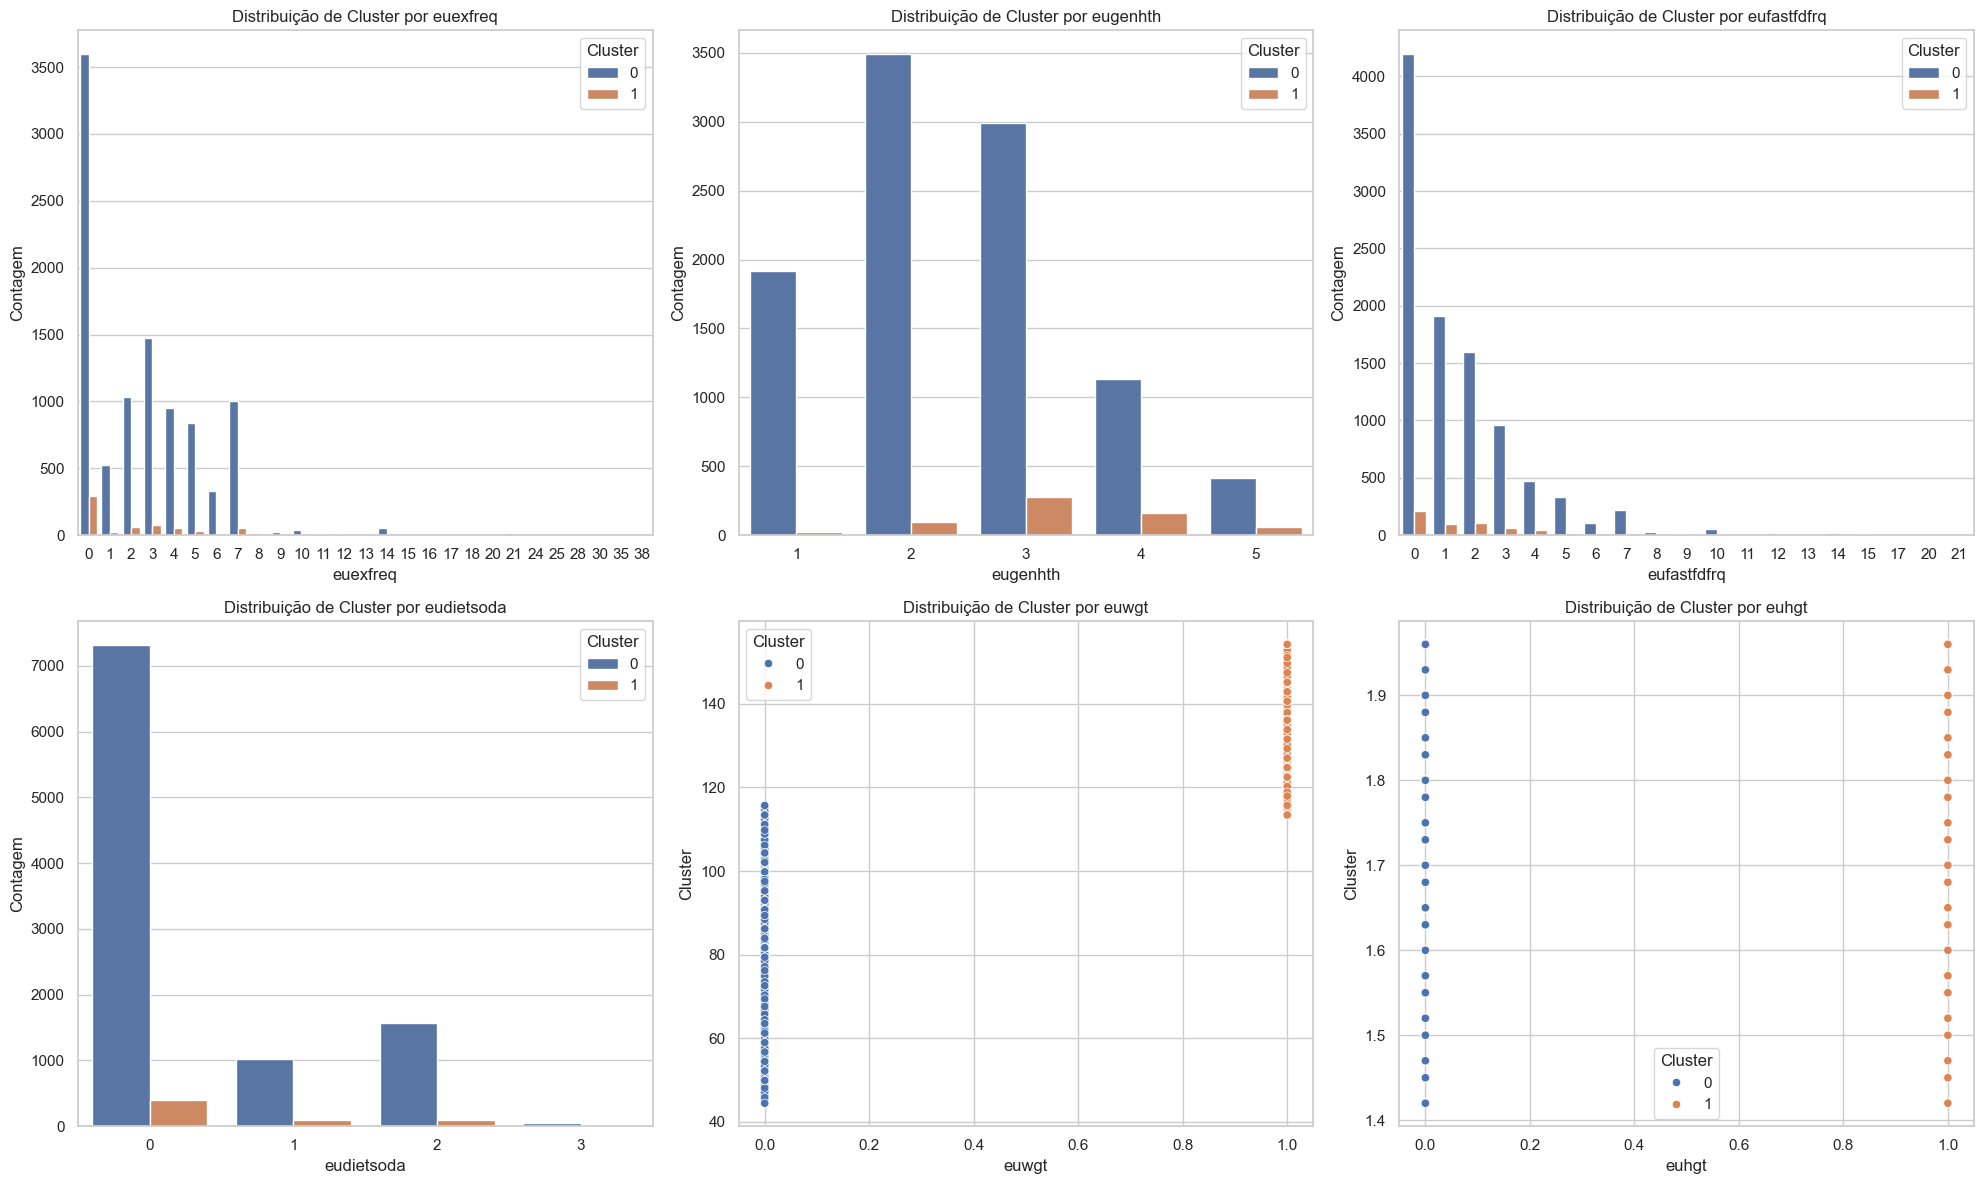

In [300]:
for df in lista_dfs:
    categorical_cols = ['euexfreq', 'eugenhth', 'eufastfdfrq', 'eudietsoda']
    quantitative_cols = ['euwgt', 'euhgt']

    # Configurando o estilo dos gráficos
    sns.set(style="whitegrid")

    # Criando a figura e os eixos
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()  # Para facilitar o loop

    # Lista de todas as colunas que serão plotadas
    all_cols = categorical_cols + quantitative_cols

    for i, col in enumerate(all_cols):
        ax = axes[i]
        if col in categorical_cols:
            # Gráfico de contagem para colunas categóricas
            sns.countplot(data=df, x=col, hue='Clusters', ax=ax)
            ax.set_title(f'Distribuição de Cluster por {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Contagem')
            ax.legend(title='Cluster')
        else:
            # Gráfico de dispersão para colunas quantitativas
            sns.scatterplot(data=df, x='Clusters', y=col, hue='Clusters', ax=ax, palette='deep')
            ax.set_title(f'Distribuição de Cluster por {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Cluster')
            ax.legend(title='Cluster')

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

In [301]:
lista_dfs_normalizado = [df_normalizado_kmeans,df_normalizado_dbscan,df_normalizado_agglomerative,df_normalizado_meanshift]

*EUEXFREQ*: Frequência (vezes) de atividades físicas nos últimos 7 dias (1 a 97).

*EUGENHTH*: Autoavaliação da saúde física:
    - 1: Excelente até 5: Ruim.

*EUFASTFDFRQ*: Frequência de compras de fast food ou alimentos prontos nos últimos 7 dias (1 a 95).

*EUDIETSODA*: Tipo de refrigerante consumido:
    - 0: Não toma refri.
    - 1: Diet.
    - 2: Normal.
    - 3: Ambos.

*EUWGT*: Peso em KG.

*EUHGT*: Altura sem sapatos, em metros.

In [302]:
display(df_normalizado_kmeans['Clusters'].value_counts())
display(df_normalizado_dbscan['Clusters'].value_counts())
display(df_normalizado_agglomerative['Clusters'].value_counts())
display(df_normalizado_meanshift['Clusters'].value_counts())

1    3028
4    2616
2    2393
0    1741
3     779
Name: Clusters, dtype: int64

 0    10554
-1        3
Name: Clusters, dtype: int64

0    10554
2        1
3        1
1        1
Name: Clusters, dtype: int64

 0    10545
-1       12
Name: Clusters, dtype: int64

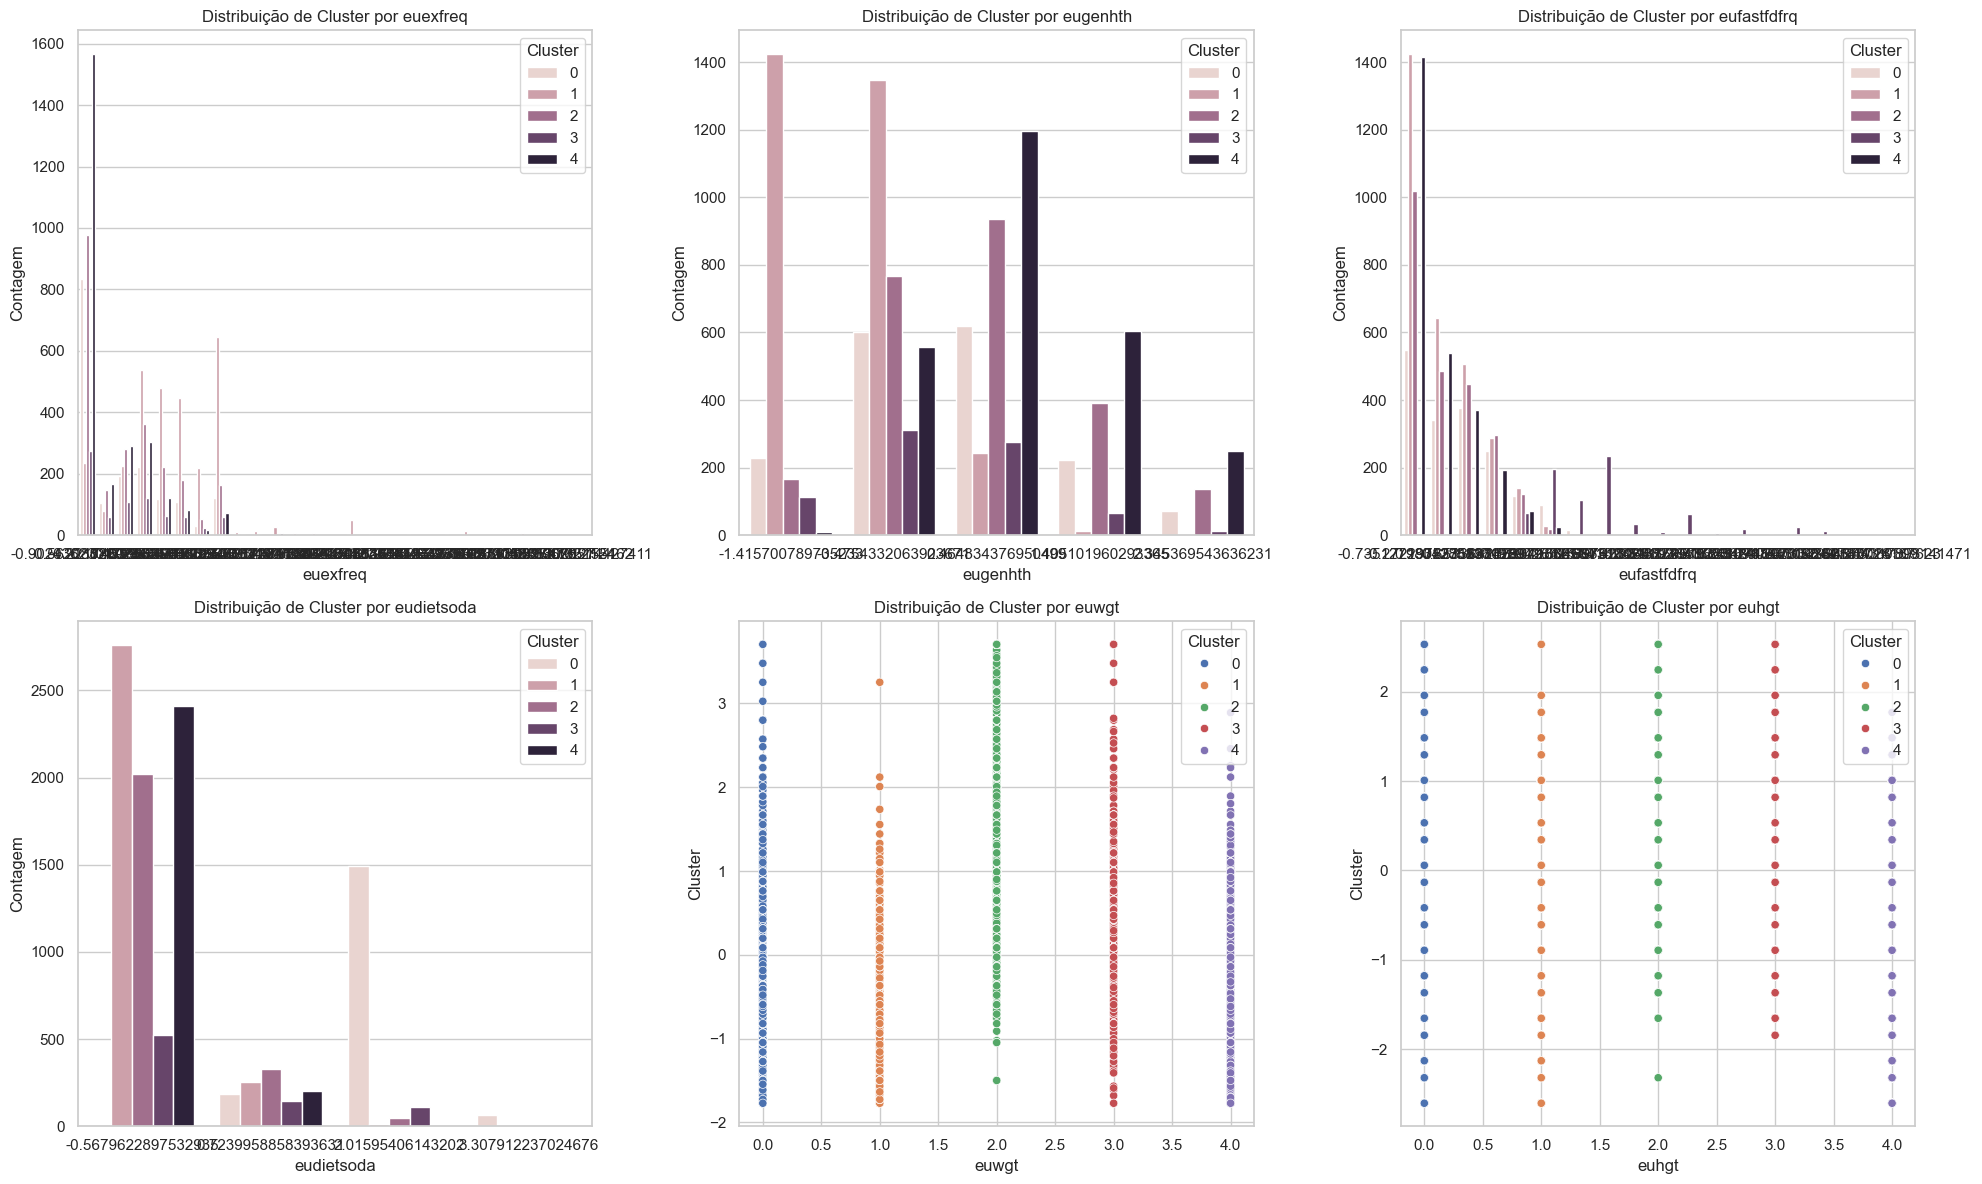

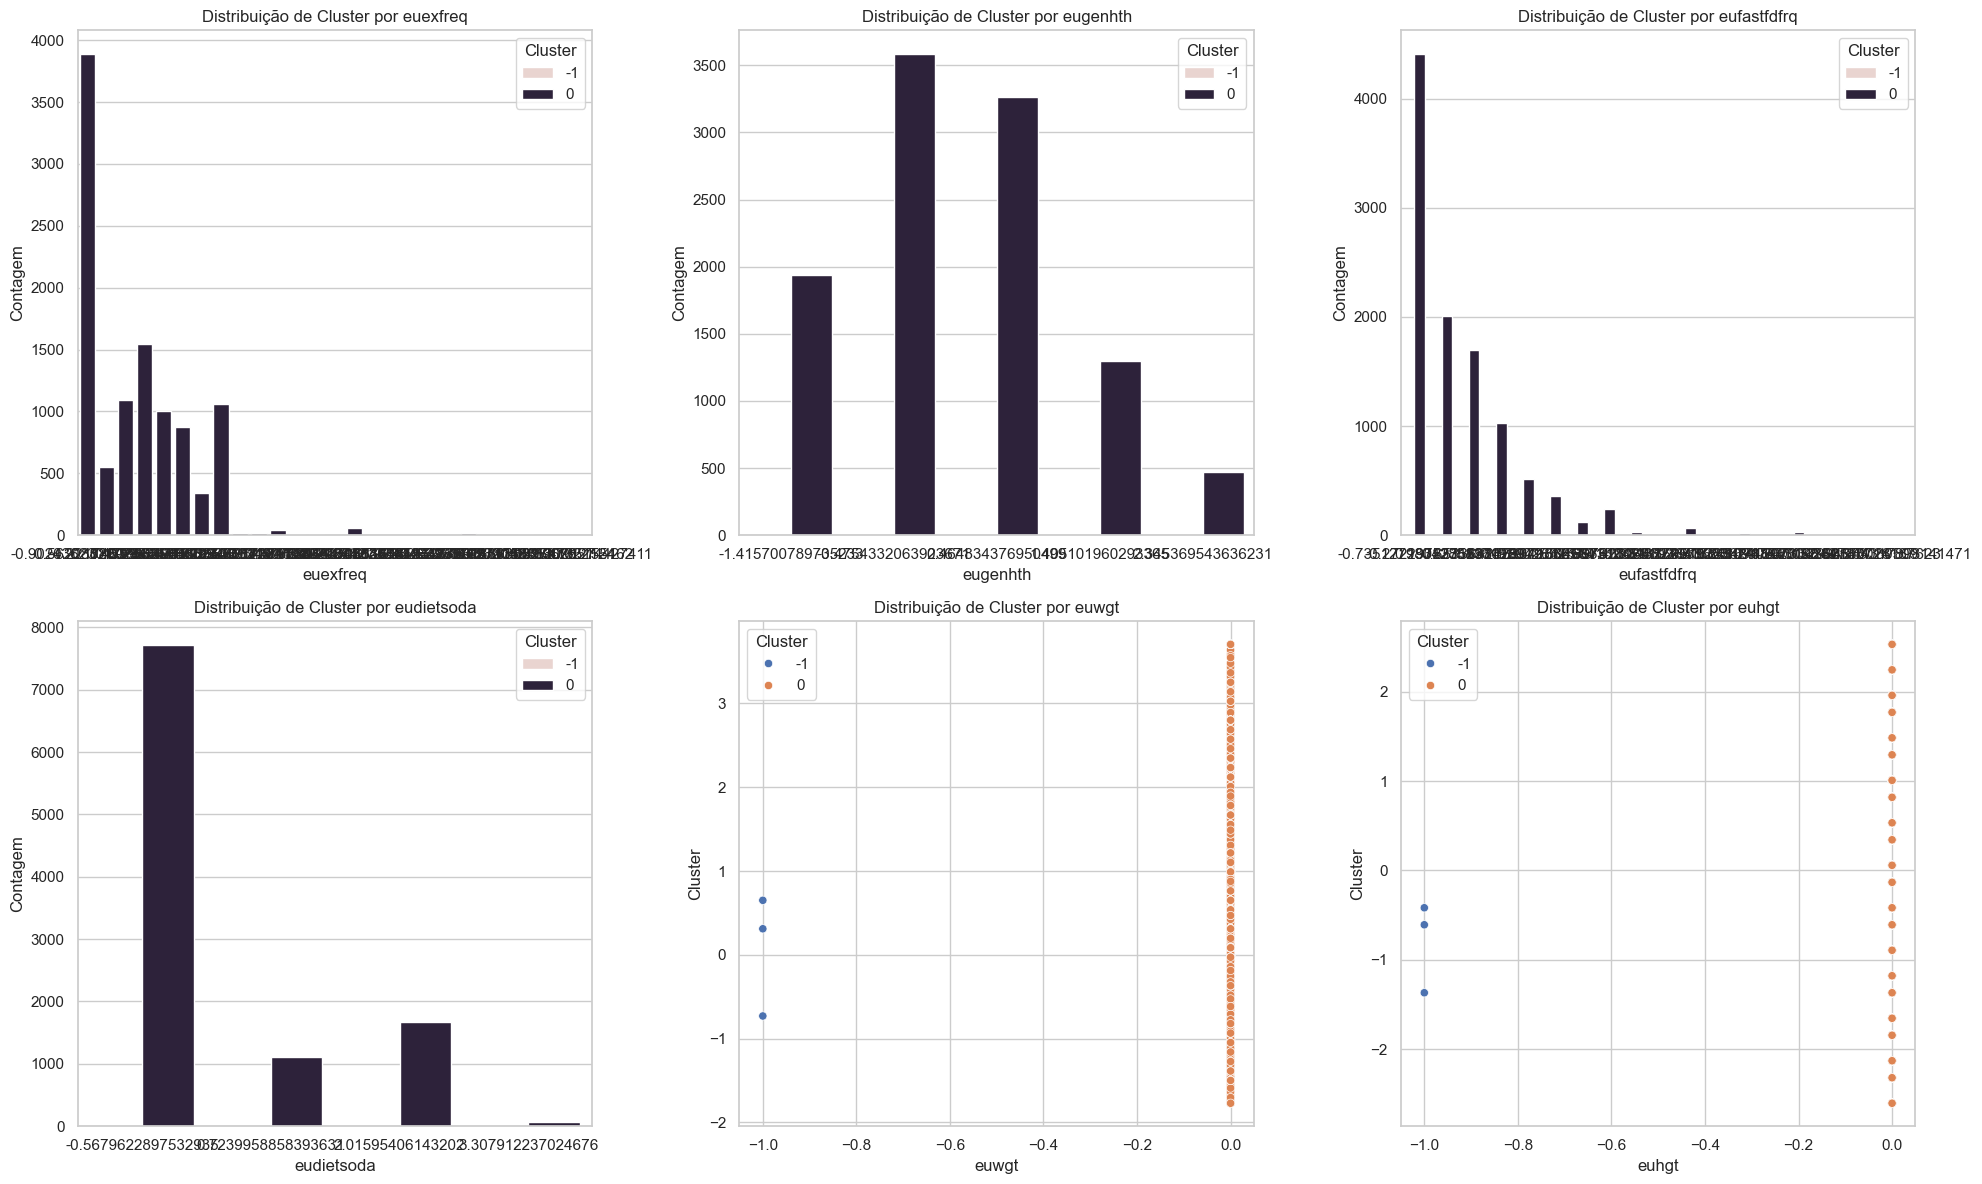

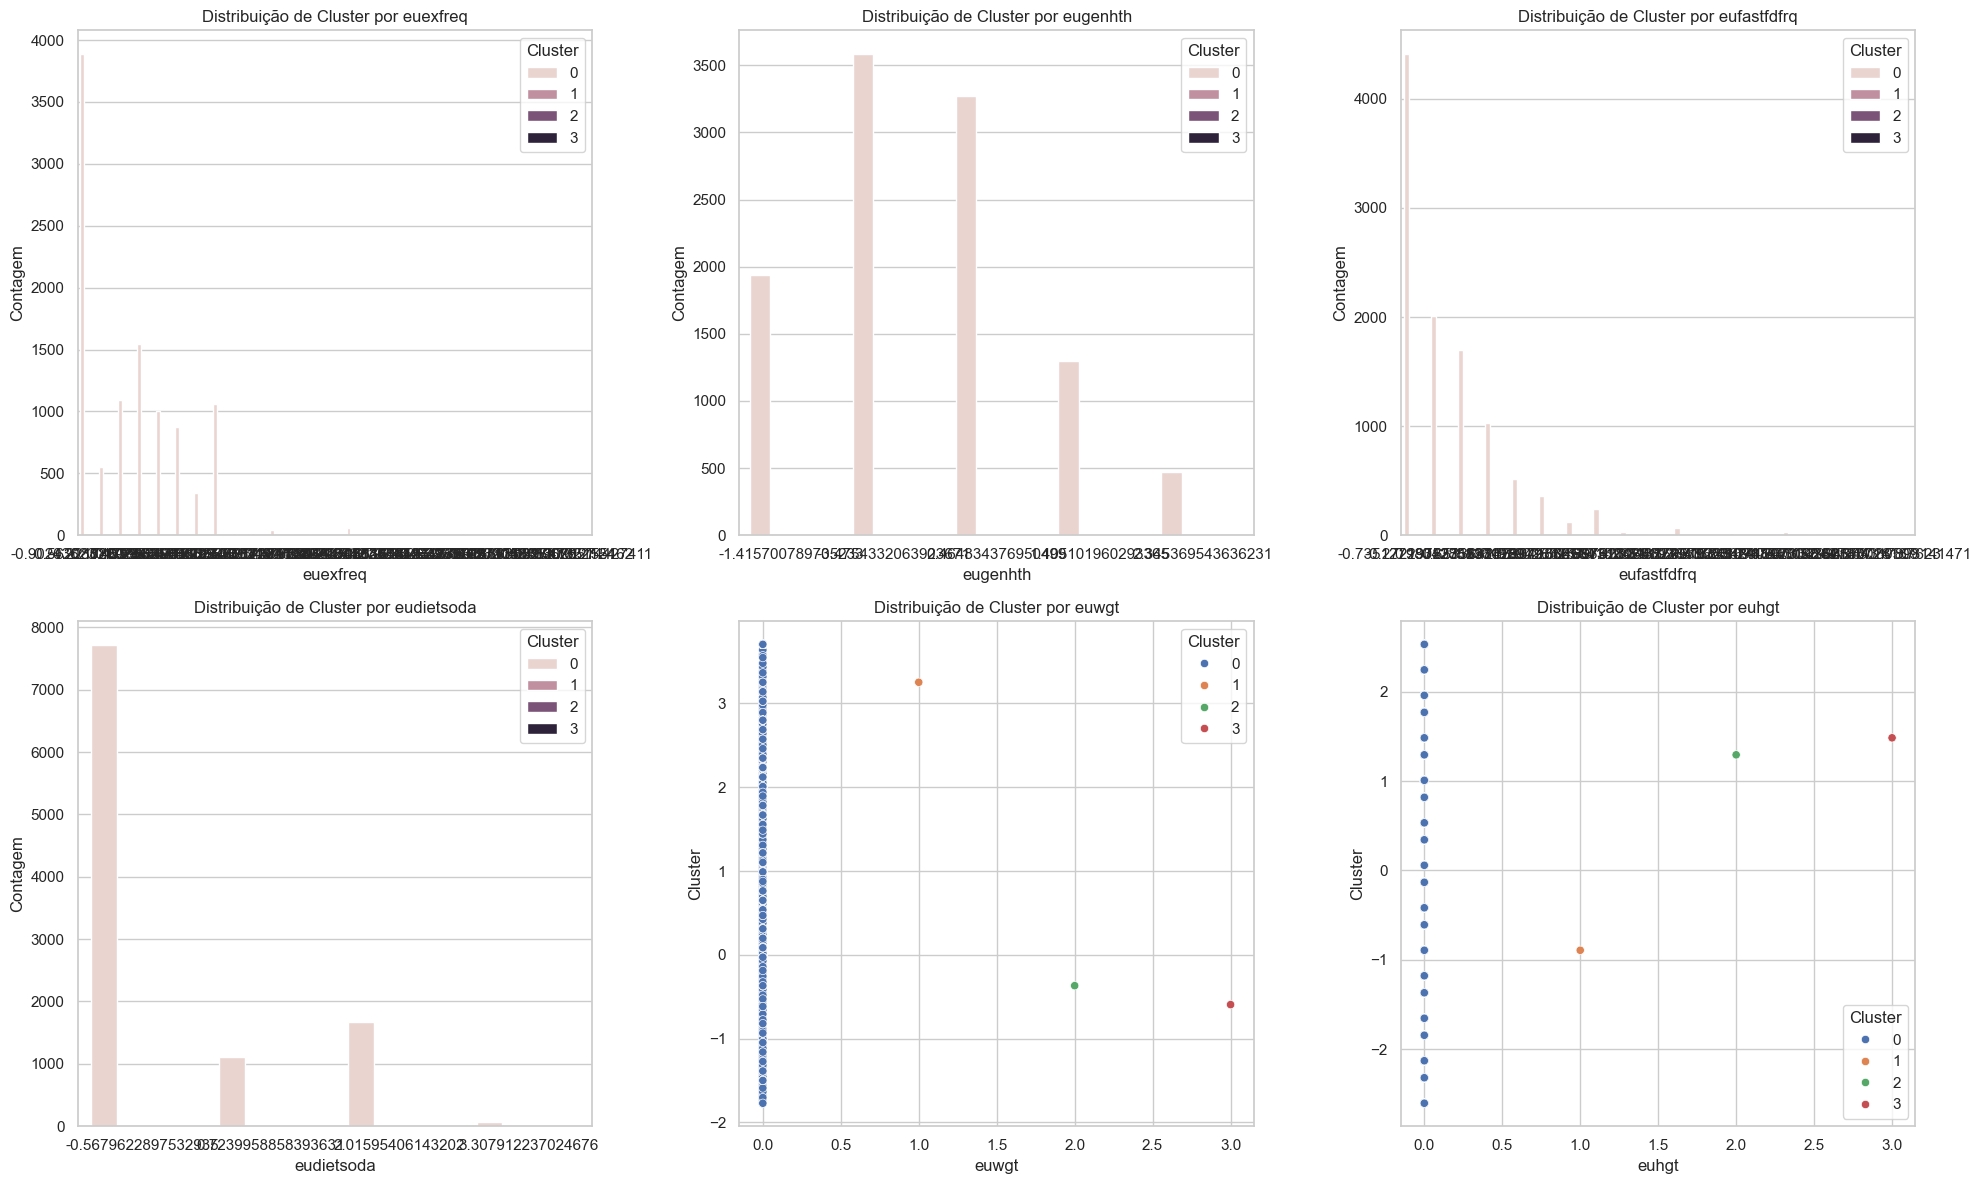

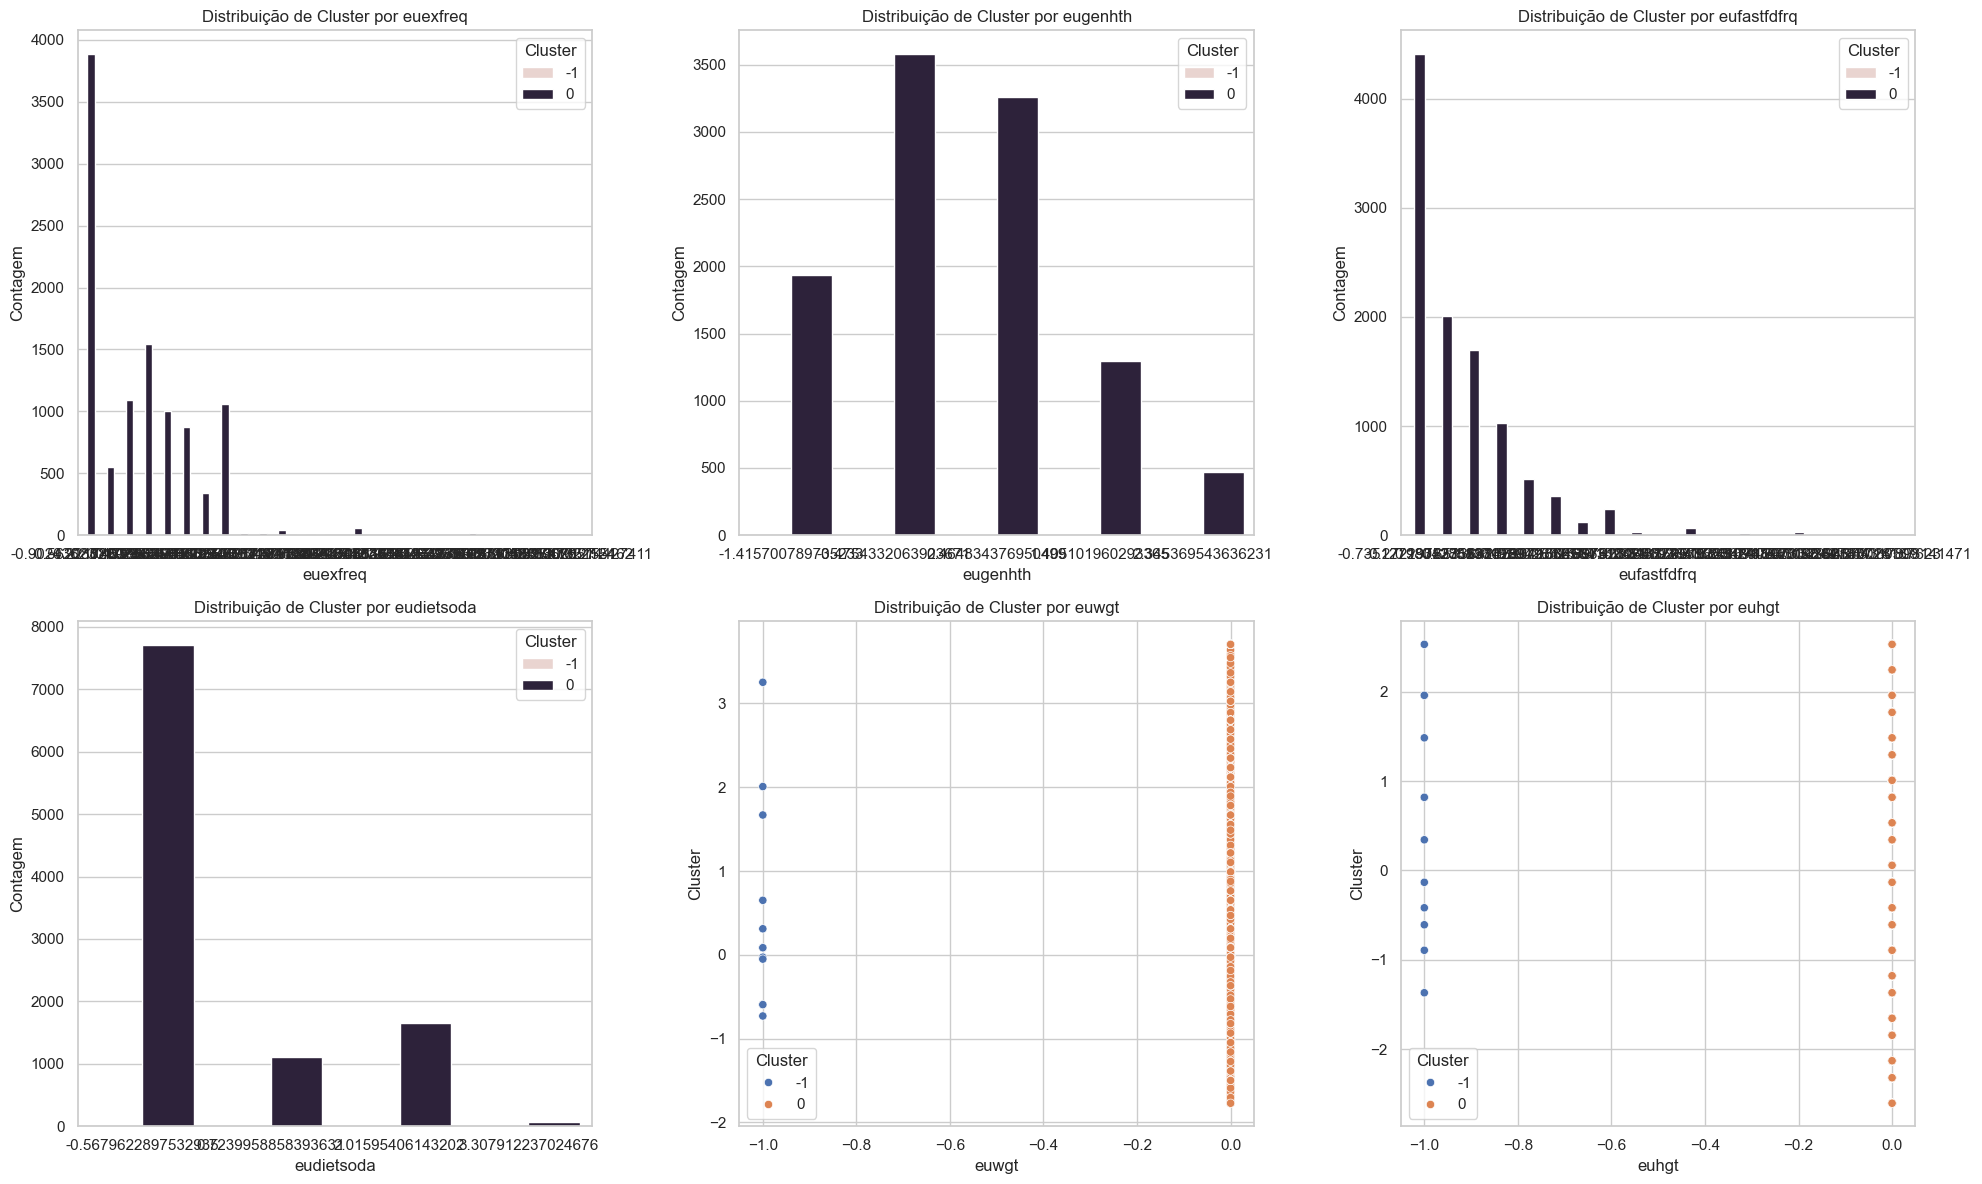

In [303]:
for df in lista_dfs_normalizado:
    categorical_cols = ['euexfreq', 'eugenhth', 'eufastfdfrq', 'eudietsoda']
    quantitative_cols = ['euwgt', 'euhgt']

    # Configurando o estilo dos gráficos
    sns.set(style="whitegrid")

    # Criando a figura e os eixos
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()  # Para facilitar o loop

    # Lista de todas as colunas que serão plotadas
    all_cols = categorical_cols + quantitative_cols

    for i, col in enumerate(all_cols):
        ax = axes[i]
        if col in categorical_cols:
            # Gráfico de contagem para colunas categóricas
            sns.countplot(data=df, x=col, hue='Clusters', ax=ax)
            ax.set_title(f'Distribuição de Cluster por {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Contagem')
            ax.legend(title='Cluster')
        else:
            # Gráfico de dispersão para colunas quantitativas
            sns.scatterplot(data=df, x='Clusters', y=col, hue='Clusters', ax=ax, palette='deep')
            ax.set_title(f'Distribuição de Cluster por {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Cluster')
            ax.legend(title='Cluster')

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

Aparentemente a melhor clusterização foi a com a base normalizada e utilizando o algorítmo K-means.

Por conter clusters bem distribuidos e aparentemennte bem descritivos para as minhas características imaginas.

#### Agora que já sabemos qual foi a "melhor" clusterização, irei me aprofundar mais nela

In [304]:
df_graph = df_kmeans.copy()
df_graph['Clusters'] = df_normalizado_kmeans['Clusters']
df_graph['imc'] = df_graph['euwgt'] / (df_graph['euhgt'] ** 2)

In [305]:
# Supondo que seu DataFrame seja 'df' e a coluna dos clusters seja 'Cluster'
cluster_summary = df_graph.groupby('Clusters').agg({
    'euexfreq': ['mean', 'median', 'std'],
    'eugenhth': ['mean', 'median', 'std'],
    'eufastfdfrq': ['mean', 'median', 'std'],
    'eudietsoda': ['mean', 'median', 'std'],
    'euwgt': ['mean', 'median', 'std'],
    'euhgt': ['mean', 'median', 'std'],
    'imc': ['mean', 'median', 'std']
}).reset_index()

display(cluster_summary)


Clusters  euexfreq                   eugenhth                  eufastfdfrq  \
                mean median       std      mean median       std        mean   
0        0  1.910971    1.0  2.360012  2.603102    3.0  1.001362    1.655370   
1        1  4.779062    4.0  3.391978  1.621863    2.0  0.658364    1.064069   
2        2  2.149185    2.0  2.276988  2.817802    3.0  0.977284    1.196824   
3        3  2.405648    2.0  2.499824  2.427471    2.0  0.894608    7.093710   
4        4  1.214450    0.0  1.817768  3.201453    3.0  0.894178    0.869266   

                   eudietsoda                        euwgt                    \
  median       std       mean median       std        mean median        std   
0    1.0  1.563819   1.931074    2.0  0.372726   79.488283  78.02  17.220757   
1    1.0  1.258938   0.093791    0.0  0.307038   69.039353  68.04  11.668787   
2    1.0  1.294169   0.176766    0.0  0.430946  102.112336  99.79  18.226601   
3    7.0  2.888271   0.472401    0.0  0.734879   86.648177  83.91  18.415219   
4    0.0  1.167319   0.077982    0.0  0.269616   70.620852  69.85  13.230777   

      euhgt                         imc                       
       mean median       std       mean     median       std  
0  1.692981   1.68  0.100300  27.764852  26.975046  5.875891  
1  1.673514   1.68  0.085235  24.644680  24.247385  3.820653  
2  1.789762   1.80  0.078257  32.145322  30.778942  6.933366  
3  1.742657   1.75  0.094462  28.523257  27.782007  5.702063  
4  1.616120   1.63  0.074851  27.152363  26.501904  5.520624

In [306]:
for coluna in df_graph[['euexfreq',
 'eugenhth',
 'eufastfdfrq',
 'eudietsoda',
 'euwgt',
 'euhgt',
 'imc']]:
    fig = px.box(df_graph, y=coluna, points= 'all', color='Clusters')
    fig.show()

## **Análises Feitas:**

### 1. **Cluster 1:**
- **Frequência de Exercícios (EUEXFREQ):** Maior frequência de exercícios, o que é positivo para a saúde.
- **Autoavaliação da Saúde (EUGENHTH):** Melhor nota, indicando uma boa percepção da saúde física.
- **Consumo de Fast Food (EUFASTFDFRQ):** Consumo mediano, equilibrado.
- **Tipo de Refrigerante (EUDIETSODA):** Melhorzinho, com valores mais próximos de 0 (menor consumo de refrigerante).
- **Peso (EUWGT) e IMC:** Peso médio e IMC menor, sugerindo uma composição corporal saudável.
- **Altura (EUHGT):** Média, sem impacto negativo significativo na saúde.

**Conclusão:** Este cluster apresenta os melhores indicadores de saúde geral, combinando alta frequência de exercícios, boa autoavaliação da saúde, baixo consumo de refrigerantes e um IMC saudável.

### 2. **Cluster 4:**
- **Frequência de Exercícios (EUEXFREQ):** Menor frequência de exercícios, o que pode impactar negativamente a saúde.
- **Autoavaliação da Saúde (EUGENHTH):** Pior nota, indicando possíveis problemas de saúde ou percepção negativa.
- **Consumo de Fast Food (EUFASTFDFRQ):** Menor consumo semanal, o que é positivo.
- **Tipo de Refrigerante (EUDIETSODA):** Melhorzinho, com valores mais próximos de 0.
- **Peso (EUWGT) e IMC:** Pesos baixos e IMC médio, que podem ser positivos, mas devem ser avaliados em conjunto com outros fatores.
- **Altura (EUHGT):** Pessoas mais baixas, o que por si só não impacta negativamente a saúde.

**Conclusão:** Embora haja aspectos positivos como baixo consumo de fast food e refrigerantes, a menor frequência de exercícios e a pior autoavaliação da saúde colocam este cluster na segunda posição.

### 3. **Cluster 2:**
- **Frequência de Exercícios (EUEXFREQ):** Mediana, equilibrada.
- **Autoavaliação da Saúde (EUGENHTH):** Mediana.
- **Consumo de Fast Food (EUFASTFDFRQ):** Mediano.
- **Tipo de Refrigerante (EUDIETSODA):** Apenas mediano.
- **Peso (EUWGT) e IMC:** Maiores pesos e IMC maior, o que pode indicar sobrepeso ou obesidade.
- **Altura (EUHGT):** Pessoas mais altas, geralmente associadas a melhores índices de saúde, mas o alto IMC contrabalança.

**Conclusão:** O alto peso e o IMC elevado são preocupantes para a saúde, colocando este cluster em uma posição intermediária, mas inferior aos anteriores devido aos riscos associados ao sobrepeso.

### 4. **Cluster 3:**
- **Frequência de Exercícios (EUEXFREQ):** Mediana.
- **Autoavaliação da Saúde (EUGENHTH):** Mediana.
- **Consumo de Fast Food (EUFASTFDFRQ):** Maior consumo, o que é negativo para a saúde.
- **Tipo de Refrigerante (EUDIETSODA):** Mediano com variação aos extremos.
- **Peso (EUWGT) e IMC:** Médio e IMC médio.
- **Altura (EUHGT):** Segundo lugar com pessoas mais altas.

**Conclusão:** O alto consumo de fast food é um fator de risco significativo, o que coloca este cluster abaixo dos anteriores em termos de saúde geral.

### 5. **Cluster 0:**
- **Frequência de Exercícios (EUEXFREQ):** Segunda menor frequência de exercícios.
- **Autoavaliação da Saúde (EUGENHTH):** Mediano.
- **Consumo de Fast Food (EUFASTFDFRQ):** Um pouco acima da média.
- **Tipo de Refrigerante (EUDIETSODA):** Pior, com alto consumo de refrigerantes.
- **Peso (EUWGT) e IMC:** Menores pesos e IMC médio, o que pode ser positivo, mas o alto consumo de refrigerantes e baixa frequência de exercícios comprometem a saúde.
- **Altura (EUHGT):** Média com muitas variações aos extremos.

**Conclusão:** Este cluster apresenta os piores indicadores de saúde devido ao alto consumo de refrigerantes e baixa frequência de exercícios, mesmo com pesos mais baixos.

### **Resumo:**
---
1. **Cluster 1 – Muito Saudável**
2. **Cluster 4 – Moderadamente Saudável**
3. **Cluster 2 – Mediano**
4. **Cluster 3 – Pouco Saudável**
5. **Cluster 0 – Muito Pouco Saudável**

---


## Predição dos Clusters

In [307]:
def funcPlotMatriz(y_test, classificar):
    matriz_de_confusao = confusion_matrix(y_test, classificar)
    sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
    plt.show()


def funcMetricas(df_metricas,modelo_Versao, df,quant_columns,Hyper_Parametros,y_test, classificar):
    metricas = [
        modelo_Versao,
        df,
        quant_columns,
        Hyper_Parametros,
        accuracy_score(y_test, classificar), 
        round(recall_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(precision_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(f1_score(y_test, classificar, pos_label=0,average='macro'),2)
        ]
    
    nova_linha_df = pd.DataFrame([metricas], columns=df_metricas.columns)

    df_metricas = pd.concat([df_metricas, nova_linha_df], ignore_index=True)
    
    return df_metricas


In [308]:
lista_modelos = [GaussianNB(),KNeighborsClassifier(),tree.DecisionTreeClassifier()]

In [309]:
lista_parametros = [{
                'pca__n_components': range(1,7),
                'model__var_smoothing': np.logspace(0,-9, num=100),
            },{
                'pca__n_components': range(1,7),
                'model__algorithm': ['auto','ball_tree'],
                'model__metric':['minkowski','euclidean','hamming','canberra'],
                'model__weights':['uniform','distance'],
                'model__n_neighbors':range(2, 11),
            },
            {
                'pca__n_components': range(1,7),
                'model__criterion': ['gini','entropy','log_loss'],
                'model__ccp_alpha': np.linspace(0, 0.02, 20).tolist(),
                'model__splitter': ['best','random'],
            }]

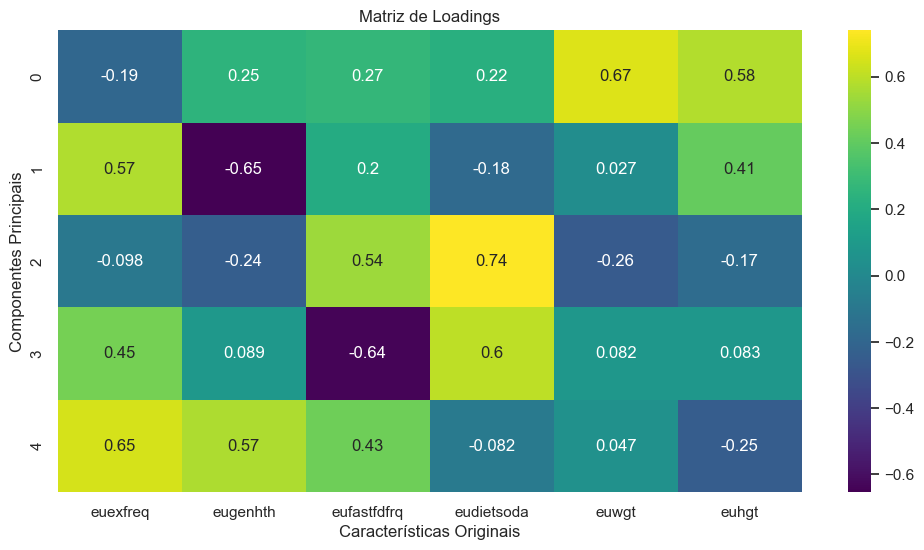

Melhores parametros:  {'model__var_smoothing': 0.1, 'pca__n_components': 5}
Melhor accuracy:  0.9329281443621305
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       390
           1       0.94      0.95      0.94       793
           2       0.93      0.93      0.93       596
           3       0.95      0.82      0.88       203
           4       0.93      0.95      0.94       658

    accuracy                           0.94      2640
   macro avg       0.94      0.92      0.93      2640
weighted avg       0.94      0.94      0.93      2640



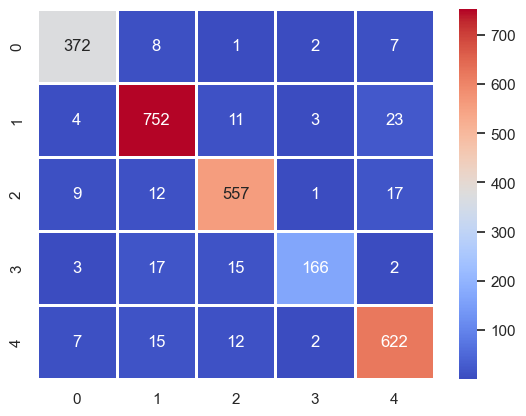

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



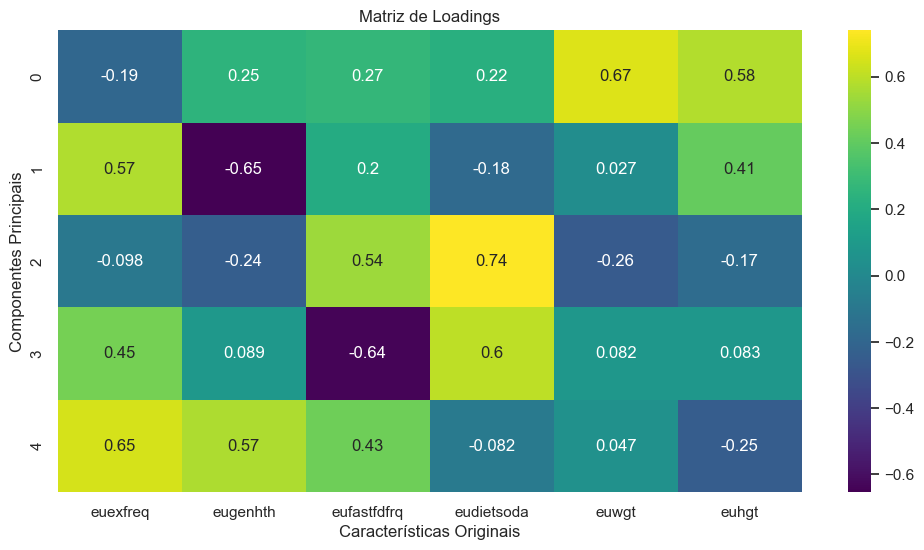

Melhores parametros:  {'model__algorithm': 'auto', 'model__metric': 'minkowski', 'model__n_neighbors': 10, 'model__weights': 'distance', 'pca__n_components': 5}
Melhor accuracy:  0.9612221392701494
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       390
           1       0.97      0.97      0.97       793
           2       0.95      0.96      0.96       596
           3       0.98      0.90      0.94       203
           4       0.96      0.97      0.96       658

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



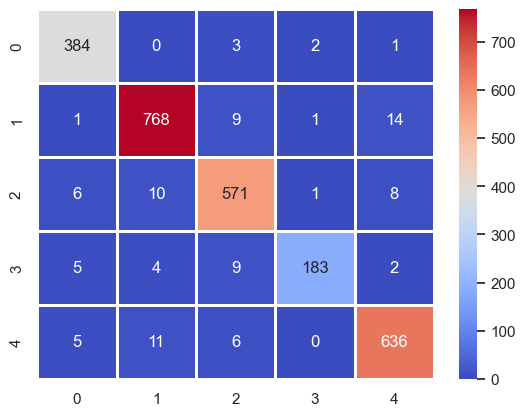

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



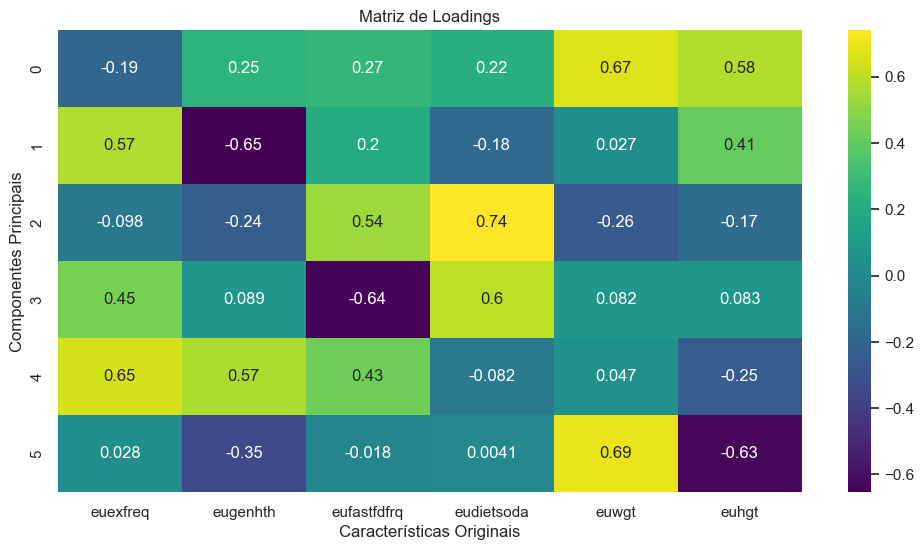

Melhores parametros:  {'model__ccp_alpha': 0.0, 'model__criterion': 'entropy', 'model__splitter': 'best', 'pca__n_components': 6}
Melhor accuracy:  0.9477062156626277
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       390
           1       0.97      0.96      0.96       793
           2       0.95      0.95      0.95       596
           3       0.91      0.87      0.89       203
           4       0.95      0.96      0.96       658

    accuracy                           0.95      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.95      0.95      0.95      2640



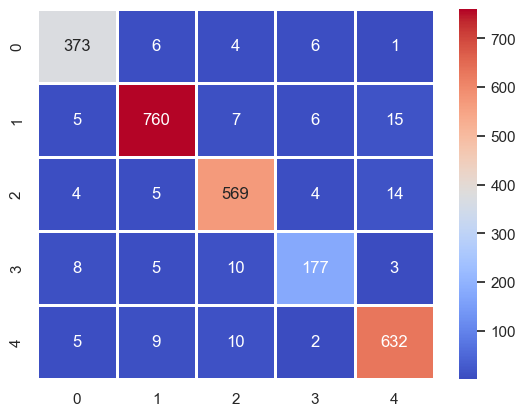

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning:

Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



,Modelo,DF,Quant_columns,Hyper_Parametros,Acuracia,Recall_Media,Precision_Media,F1_Score_Media
0,GaussianNB(),euexfreq eugenhth eufastfdfrq eudiet...,5,"{'model__var_smoothing': 0.1, 'pca__n_componen...",0.935227,0.92,0.94,0.93
1,KNeighborsClassifier(),euexfreq eugenhth eufastfdfrq eudiet...,5,"{'model__algorithm': 'auto', 'model__metric': ...",0.962879,0.96,0.96,0.96
2,DecisionTreeClassifier(),euexfreq eugenhth eufastfdfrq eudiet...,6,"{'model__ccp_alpha': 0.0, 'model__criterion': ...",0.951136,0.94,0.94,0.94


In [310]:
df_metricas = pd.DataFrame(columns=['Modelo','DF','Quant_columns','Hyper_Parametros','Acuracia','Recall_Media', 'Precision_Media', 'F1_Score_Media'])

for k,v in enumerate(lista_parametros):
    X_train, X_test, y_train, y_test = train_test_split(df_normalizado_kmeans[df_normalizado_kmeans.columns[:-1]], df_normalizado_kmeans['Clusters'], test_size=0.25,random_state=42,shuffle=True)
    # X_train = np.ascontiguousarray(X_train)
    # X_test = np.ascontiguousarray(X_test)

    pipe = Pipeline([
                ('pca', PCA()),
                ('model', lista_modelos[k])
                ])

    grid_search = GridSearchCV(estimator = pipe,param_grid=v,n_jobs=-1,scoring='accuracy')

    grid_search.fit(X_train,y_train)


    pca =grid_search.best_estimator_.named_steps['pca']
    
    components_df = pd.DataFrame(pca.components_, columns=df_normalizado_kmeans.columns.tolist()[:-1])

    # Plotagem
    plt.figure(figsize=(12, 6))
    sns.heatmap(components_df, cmap='viridis', annot=True)
    plt.xlabel('Características Originais')
    plt.ylabel('Componentes Principais')
    plt.title('Matriz de Loadings')
    plt.show()

    # Analisando os resultados 
    melhor = grid_search.best_params_
    classificador_grafico = grid_search.best_estimator_ 
    print("Melhores parametros: ",melhor)
    print("Melhor accuracy: ",grid_search.best_score_)
    previsao = classificador_grafico.predict(X_test)
    metricas = classification_report(y_test,previsao)
    print(metricas)
    funcPlotMatriz(y_test, previsao)
    df_metricas = funcMetricas(df_metricas,f'{lista_modelos[k]}',df_normalizado_kmeans,len(pca.components_),melhor,y_test,previsao)

display(df_metricas)        

#### O modelo com o melhor desempenho, foi, o KNN

In [311]:
df_metricas['Hyper_Parametros'][1]

{'model__algorithm': 'auto',
 'model__metric': 'minkowski',
 'model__n_neighbors': 10,
 'model__weights': 'distance',
 'pca__n_components': 5}

## Serialização

In [312]:
df_fit = df_kmeans.copy()

In [313]:
df_fit['Clusters'] = df_normalizado_kmeans['Clusters']

In [314]:
df_fit

,euexfreq,eugenhth,eufastfdfrq,eudietsoda,euwgt,euhgt,Clusters
0,0,1,0,0,77.11,1.52,1
1,0,2,1,0,58.06,1.60,4
2,0,5,0,0,122.47,1.57,4
3,5,4,0,0,95.25,1.75,2
4,2,3,3,1,99.79,1.80,2
...,...,...,...,...,...,...,...
10552,5,3,0,0,67.59,1.57,4
10553,2,2,3,2,81.65,1.73,0
10554,2,1,4,0,64.41,1.70,1
10555,1,1,3,1,76.20,1.80,0


In [315]:
import pickle

In [316]:
X_train, X_test, y_train, y_test = train_test_split(df_kmeans[df_kmeans.columns[:-1]], df_normalizado_kmeans['Clusters'], test_size=0.25,random_state=42,shuffle=True)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       390
           1       0.97      0.97      0.97       793
           2       0.95      0.95      0.95       596
           3       0.98      0.90      0.94       203
           4       0.96      0.96      0.96       658

    accuracy                           0.96      2640
   macro avg       0.96      0.95      0.96      2640
weighted avg       0.96      0.96      0.96      2640



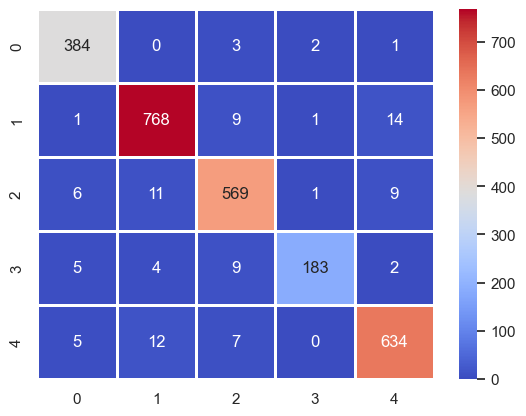

In [317]:
pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('model', KNeighborsClassifier())
            ])

pipe.set_params(**df_metricas['Hyper_Parametros'][1])
pipe.fit(X_train,y_train)

previsao = pipe.predict(X_test)
metricas = classification_report(y_test,previsao)
print(metricas)
funcPlotMatriz(y_test, previsao)

In [318]:
filename = 'modelo_nao_supervisionado.pkl'
pickle.dump(pipe, open(filename, 'wb'))